**Importing Libraries for Machine Learning Model**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')





# Load the dataset


In [3]:
data = pd.read_csv('/content/drive/MyDrive/MinorProject.csv')

In [4]:
# Display the first few rows of the dataset
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [5]:
# Display information about the dataset, including data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [6]:
# Display the shape of the dataset (rows, columns)
data.shape

(1009, 7)

In [7]:
# Count the number of non-NA cells for each column
data.count()

Date         1009
Open         1009
High         1009
Low          1009
Close        1009
Adj Close    1009
Volume       1009
dtype: int64

In [8]:
# Display data types of each column
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [9]:
# Generate descriptive statistics
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [10]:
# Check for missing values
data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
# Display the first few rows again
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [12]:
# Identify columns with object data type
data.select_dtypes(include = 'object').columns

Index(['Date'], dtype='object')

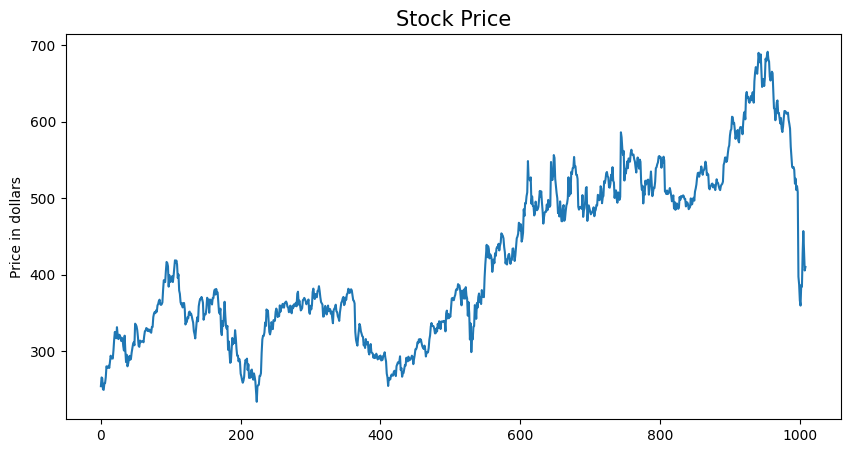

In [13]:
# Plot the 'Close' column to visualize stock prices
plt.figure(figsize=(10,5))
plt.plot(data['Close'])
plt.title('Stock Price', fontsize = 15)
plt.ylabel('Price in dollars')
plt.show()


In [14]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [15]:
data[data['Close'] == data['Adj Close']].shape

(1009, 7)

In [16]:
# Drop the 'Adj Close' column as it is not needed
df = data.drop(['Adj Close'],axis = 1)
df.head()

,Date,Open,High,Low,Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,16906900


In [17]:
# Check for missing values in the new dataframe
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

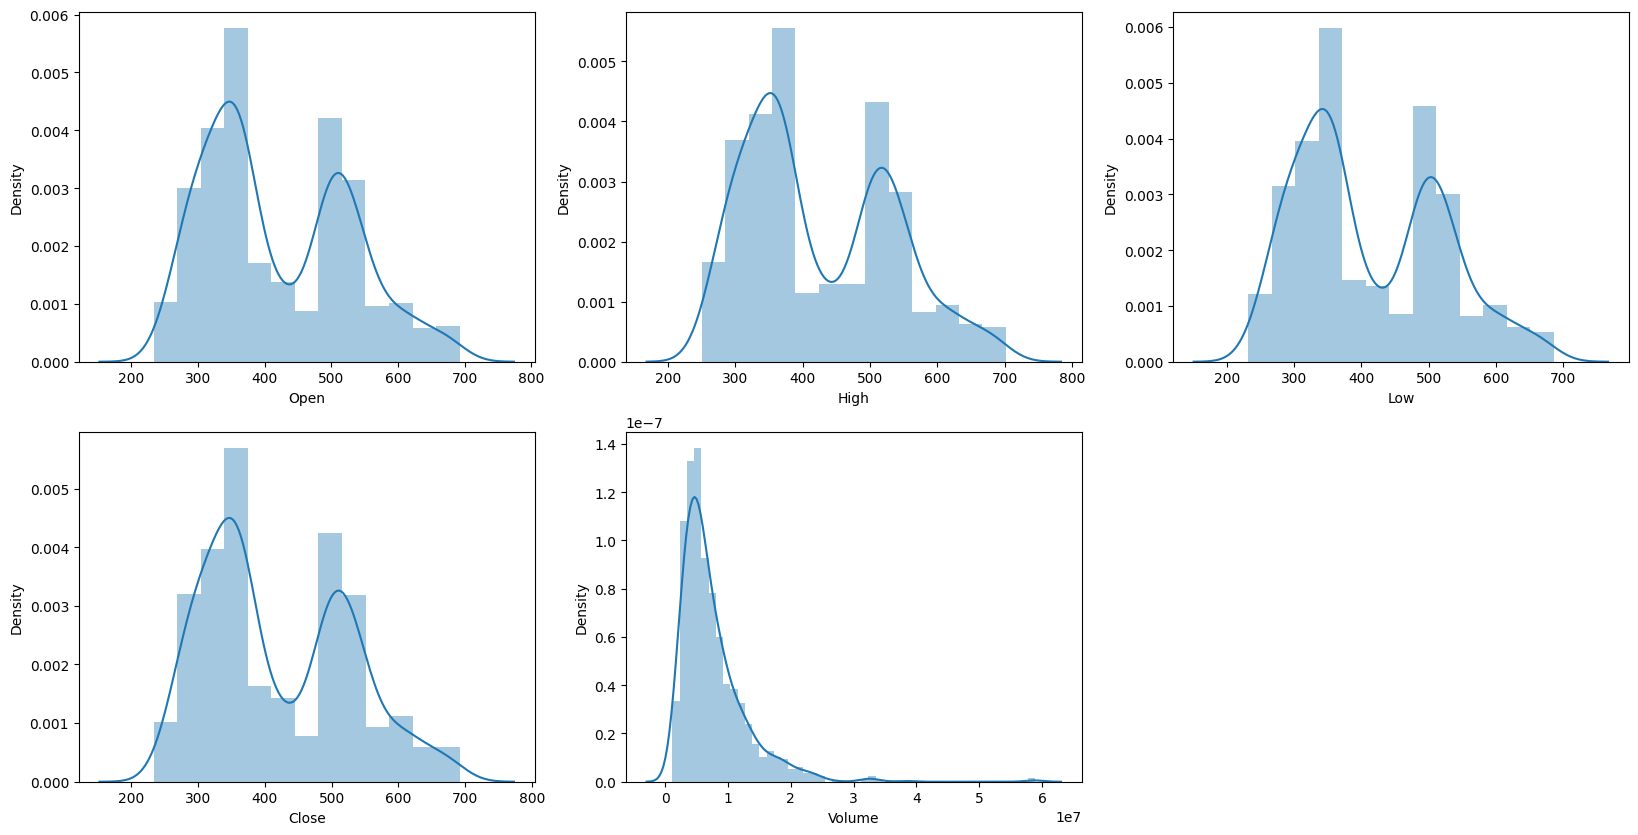

In [18]:
# Define features to be used
features = ['Open', 'High', 'Low', 'Close', 'Volume']

# Plot distribution of each feature
plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.distplot(df[col])
plt.show()

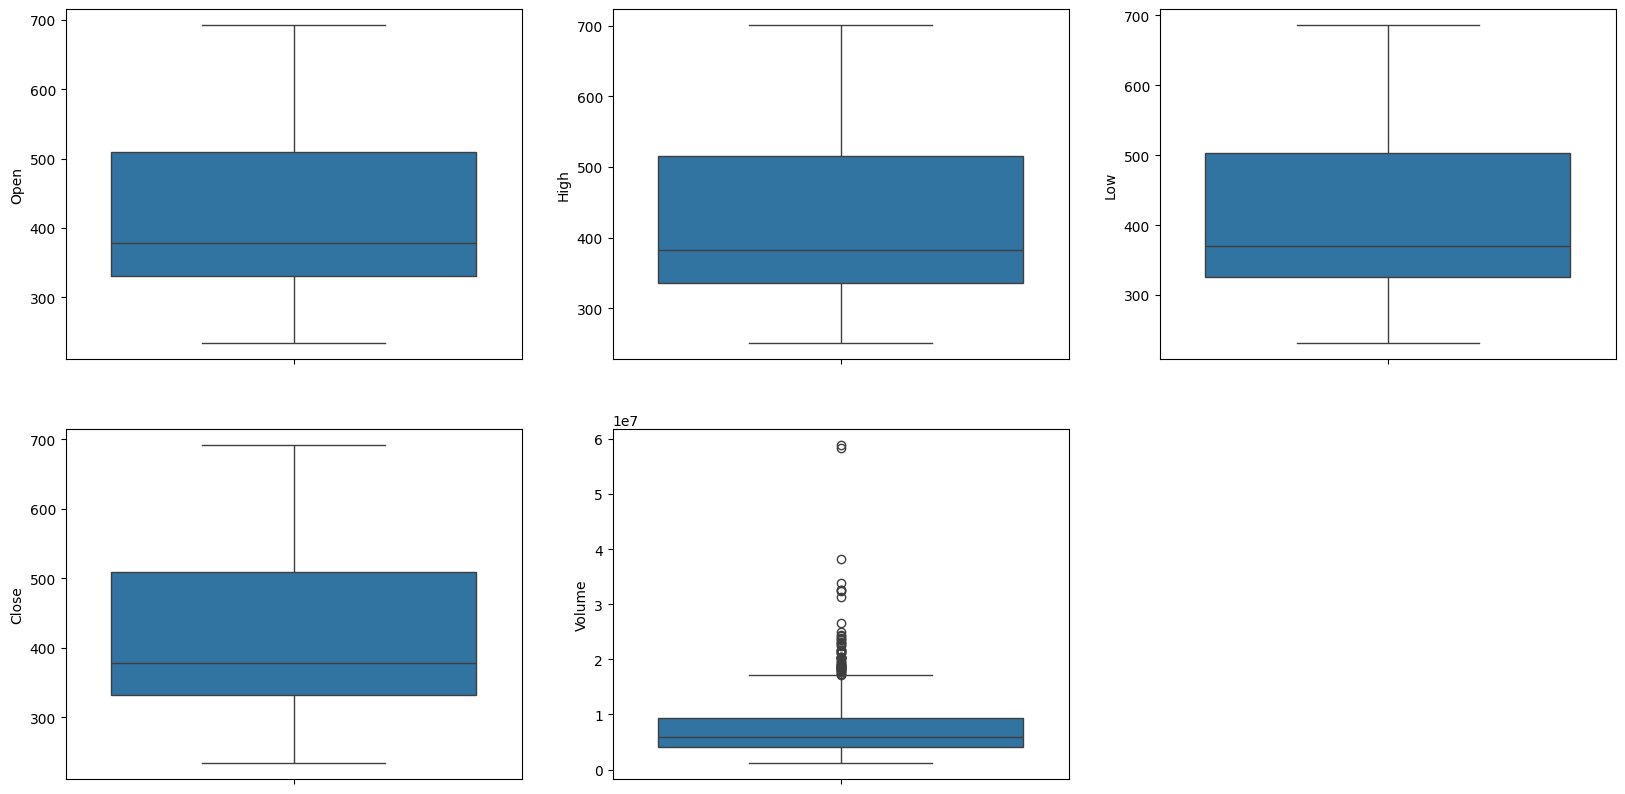

In [19]:
# Plot boxplots of each feature to detect outliers
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.boxplot(df[col])
plt.show()

In [20]:
# Convert 'Date' column to datetime format and extract day, month, year
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

splitted = df['Date'].dt.strftime('%d/%m/%Y').str.split('/', expand=True)

df['Day'] = splitted[0].astype('int')
df['Month'] = splitted[1].astype('int')
df['Year'] = splitted[2].astype('int')

df.head()

,Date,Open,High,Low,Close,Volume,Day,Month,Year
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,11896100,5,2,2018
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,12595800,6,2,2018
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,8981500,7,2,2018
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,9306700,8,2,2018
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,16906900,9,2,2018


In [21]:
# Add a column to identify quarter-end months
df['is_quarter_end'] = np.where(df['Month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,Day,Month,Year,is_quarter_end
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,11896100,5,2,2018,0
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,12595800,6,2,2018,0
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,8981500,7,2,2018,0
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,9306700,8,2,2018,0
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,16906900,9,2,2018,0


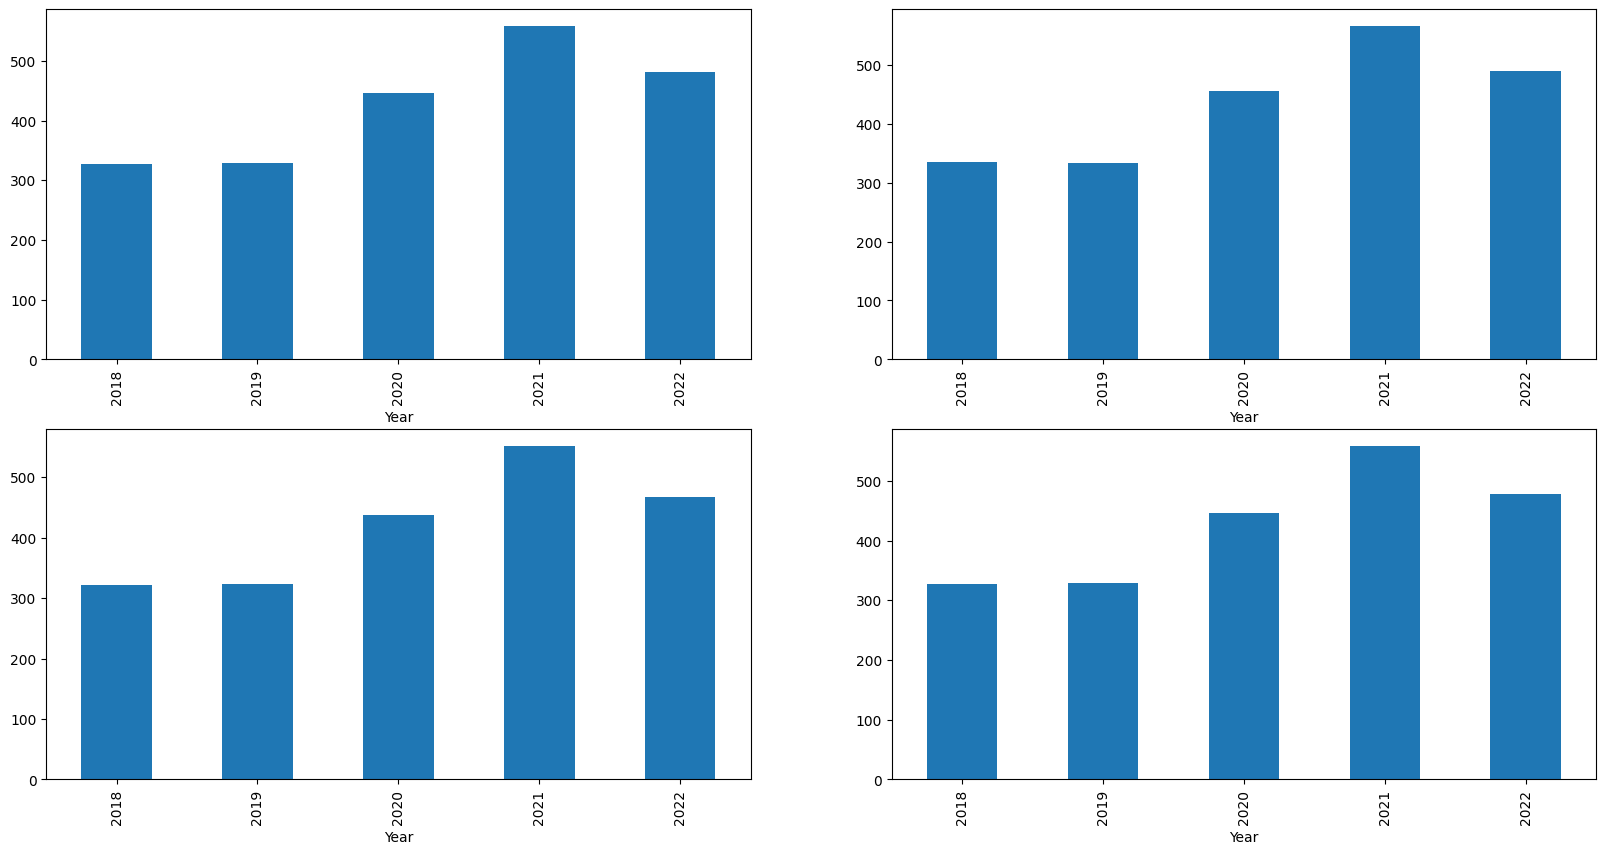

In [22]:
# Group data by year and calculate mean
data_grouped = df.groupby('Year').mean()

# Plot the mean values of 'Open', 'High', 'Low', 'Close' by year
plt.subplots(figsize=(20,10))

for i , col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [23]:
# Drop the 'Date' column as it is no longer needed
if 'Date' in df.columns:
  df = df.drop(['Date'], axis = 1)
else:
  print("The 'Date' column does not exist in the DataFrame.")

In [24]:
# Group data by quarter-end status and calculate mean
df.groupby('is_quarter_end').mean()

,Open,High,Low,Close,Volume,Day,Month,Year
is_quarter_end,,,,,,,,
0,418.681368,424.889821,412.112068,418.699791,7.951664e+06,15.715774,6.087798,2019.622024
1,419.814037,426.179910,412.896440,419.600831,6.810988e+06,15.721068,7.442136,2019.543027


In [25]:
# Create new features 'open-close' and 'low-high'
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']

# Create target variable indicating if the next day's close is higher than the current day's close
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

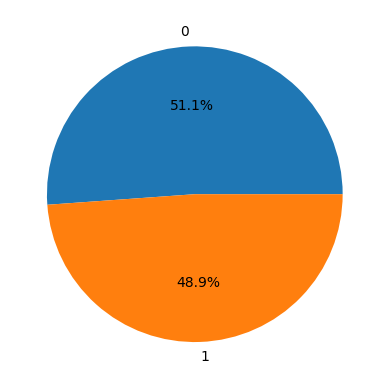

In [26]:
# Plot the target variable distribution
plt.pie(df['target'].value_counts().values, labels = [0,1], autopct='%1.1f%%')
plt.show()

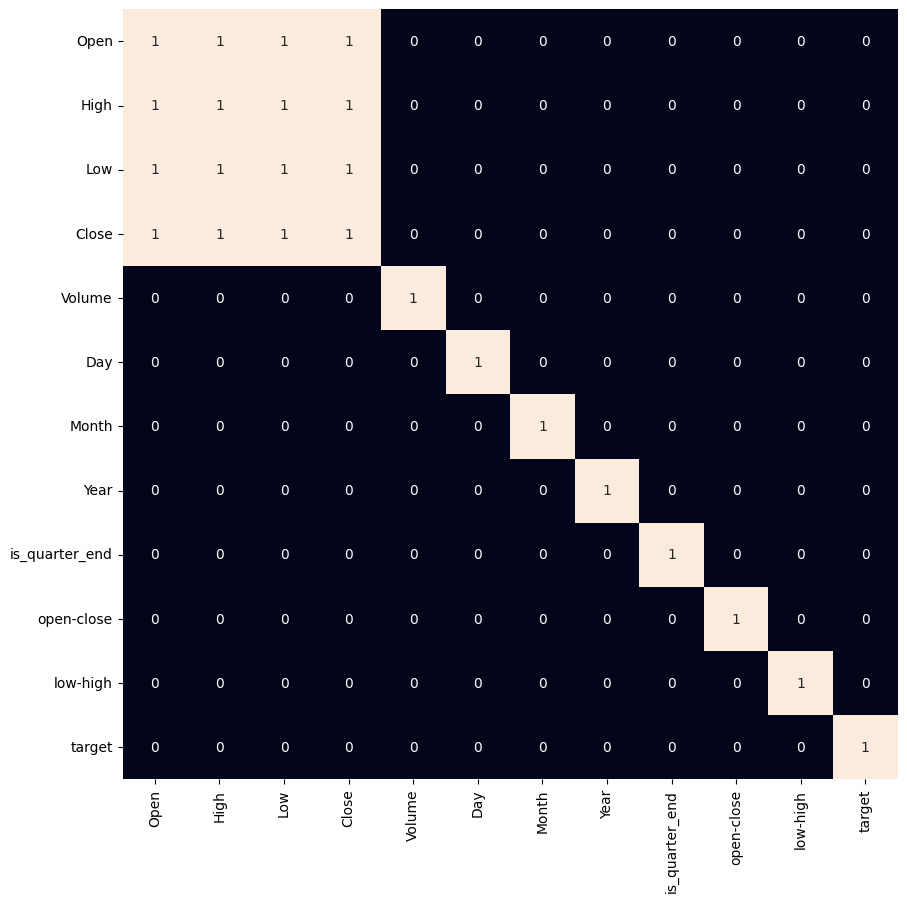

In [27]:
# Plot correlation heatmap for features
plt.figure(figsize=(10,10))
sns.heatmap(df.corr() > 0.9, annot = True, cbar = False)
plt.show()

In [28]:
# Select relevant features and target variable
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

# Standardize features
scalar = StandardScaler()
features = scalar.fit_transform(features)

# Split data into training and validation sets
X_train, X_valid, Y_train, Y_valid = train_test_split(features, target, test_size = 0.1, random_state = 2021)
print(X_train.shape, X_valid.shape)

(908, 3) (101, 3)


In [29]:
# Define models to be used
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

# Train and evaluate each model
for i in range(3):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]}: ')
  print('Training Accuracy: ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy: ', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression(): 
Training Accuracy:  0.55244011939719
Validation Accuracy:  0.5094339622641509

SVC(kernel='poly', probability=True): 
Training Accuracy:  0.4568883927488048
Validation Accuracy:  0.49646226415094336

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...): 
Training Accuracy

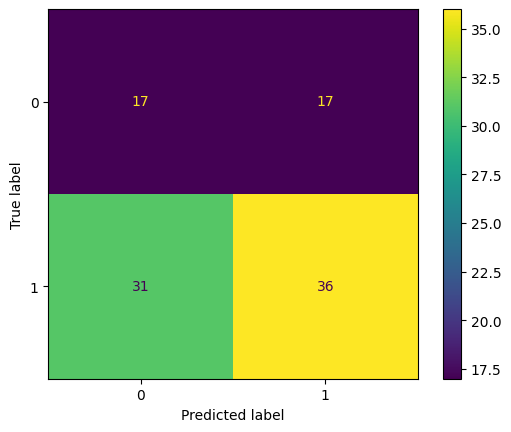

In [30]:
# Plot confusion matrix for Logistic Regression model
metrics.ConfusionMatrixDisplay.from_predictions(models[0].predict(X_valid), Y_valid)
plt.show()